In [6]:
!pip install surprise

In [7]:
import numpy as np
import pandas as pd

import surprise

import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df_ratings = pd.read_csv('/notebooks/ml-latest-small/ratings.csv')
df_movies = pd.read_csv('/notebooks/ml-latest-small/movies.csv')
df_tags = pd.read_csv('/notebooks/ml-latest-small/tags.csv')
df_links = pd.read_csv('/notebooks/ml-latest-small/links.csv')

## EDA

(array([520.,  54.,  15.,  12.,   5.,   0.,   1.,   1.,   0.,   2.]),
 array([  20. ,  287.8,  555.6,  823.4, 1091.2, 1359. , 1626.8, 1894.6,
        2162.4, 2430.2, 2698. ]),
 <BarContainer object of 10 artists>)

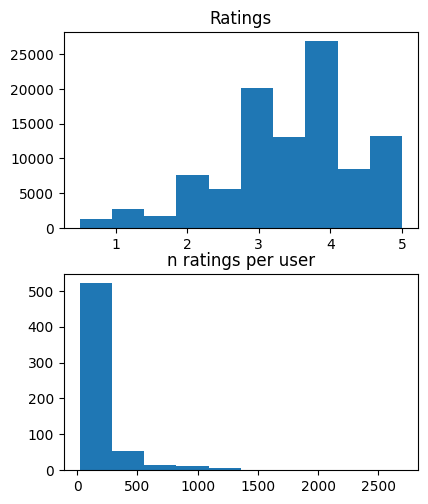

In [35]:
fig, axes = plt.subplots(2)
fig.tight_layout()
fig.set_size_inches(4,5)

axes[0].set_title('Ratings')
axes[0].hist(df_ratings['rating'])

axes[1].set_title('n ratings per user')
axes[1].hist(df_ratings['userId'].value_counts().values)

## Models

In [10]:
from surprise import Reader, Dataset
from surprise.model_selection import train_test_split
from surprise.prediction_algorithms.knns import *
from surprise.prediction_algorithms.matrix_factorization import *
from surprise.accuracy import rmse

reader = Reader(rating_scale=(0.5,5.0))
data = Dataset.load_from_df(df_ratings[['userId', 'movieId', 'rating']], reader=reader)
train_dataset, test_dataset = train_test_split(data, test_size=0.2, random_state=42)

knnBasic = KNNBasic()
knnBasic.fit(train_dataset)
knnBasic_pred = knnBasic.test(test_dataset)
rmse(knnBasic_pred)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9578


0.9578061143849369

In [11]:
knn_z = KNNWithZScore()
knn_z.fit(train_dataset)
knn_z_pred = knn_z.test(test_dataset)
rmse(knn_z_pred)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9010


0.9010250426386929

In [14]:
svd = SVD()
svd.fit(train_dataset)
svd_pred = svd.test(test_dataset)
rmse(svd_pred)

RMSE: 0.8808


0.8807994602906565

In [13]:
svdpp = SVDpp()
svdpp.fit(train_dataset)
svdpp_pred = svdpp.test(test_dataset)
rmse(svdpp_pred)

RMSE: 0.8685


0.8685193709526604

## Recommendation

In [39]:
model = SVDpp()
model.fit(data.build_full_trainset())

In [33]:
users = df_ratings['userId'].unique()
items = df_ratings['movieId'].unique()

In [92]:
def recommend_item(user_id, model, k):
    seen = df_ratings[df_ratings['userId']==3]['movieId'].values
    unseen = np.setdiff1d(items, seen)
    pred = [model.predict(user_id, item_id)[3] for item_id in unseen]
    
    topk = np.argsort(pred)[::-1][:10]
    topk_id = unseen[topk]
    
    print(f'Top{k} recommendation for user {user_id}\n')
    for i, movie_id in enumerate(topk_id):
        movie_name = df_movies[df_movies['movieId']==movie_id]['title'].values
        print(f'{i+1}: {movie_name}')

In [93]:
user_id = np.random.choice(users)
recommend_item(user_id, model, 10)

Top10 recommendation for user 230

1: ['Legend of Drunken Master, The (Jui kuen II) (1994)']
2: ['Doctor Who: The Time of the Doctor (2013)']
3: ['Pirates of the Caribbean: The Curse of the Black Pearl (2003)']
4: ['Matrix Revolutions, The (2003)']
5: ['Tommy Boy (1995)']
6: ['Go (1999)']
7: ['Lord of the Rings: The Two Towers, The (2002)']
8: ['Star Wars: Episode VI - Return of the Jedi (1983)']
9: ['Star Trek (2009)']
10: ['Day of the Doctor, The (2013)']
